<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/rain_pdf_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru1972_2022.csv")
data

data.head()

,datetime,rain,temp_min,temp_max
0,1972-01-01,0.0,16.16,27.92
1,1972-01-02,0.0,15.08,27.79
2,1972-01-03,0.0,13.68,28.73
3,1972-01-04,0.0,14.15,28.92
4,1972-01-05,0.0,13.68,28.44


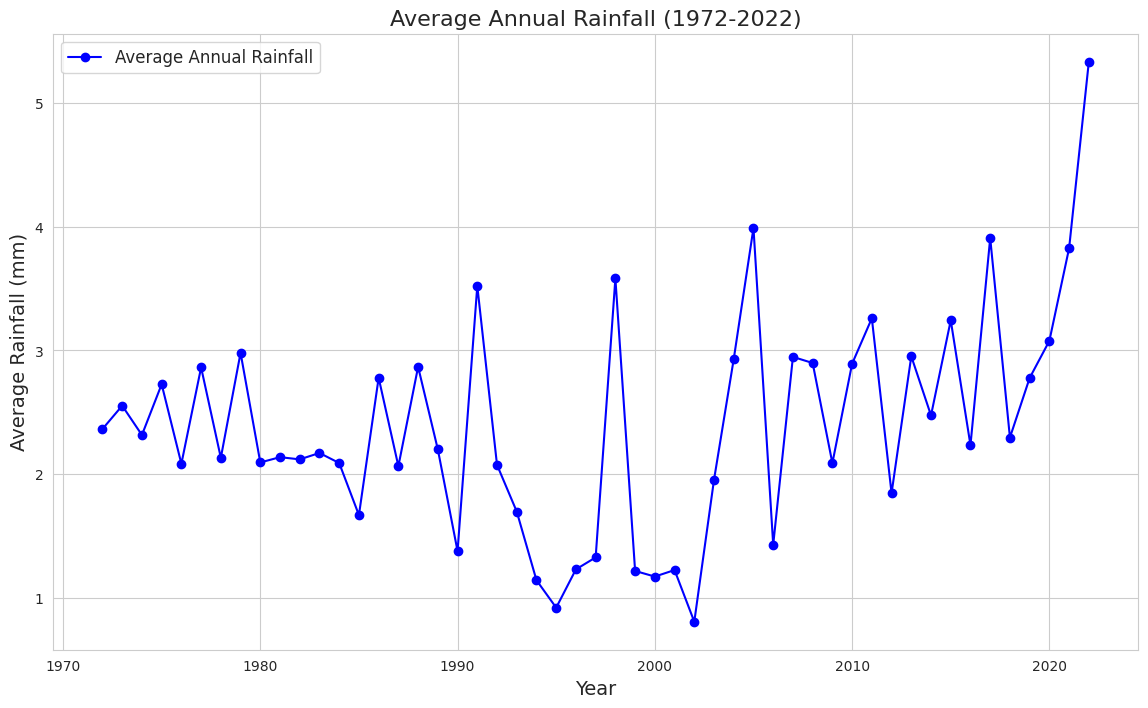

In [2]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
annual_rainfall = data.groupby('year')['rain'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.plot(annual_rainfall['year'], annual_rainfall['rain'], marker='o', linestyle='-', color='blue', label='Average Annual Rainfall')

plt.title('Average Annual Rainfall (1972-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

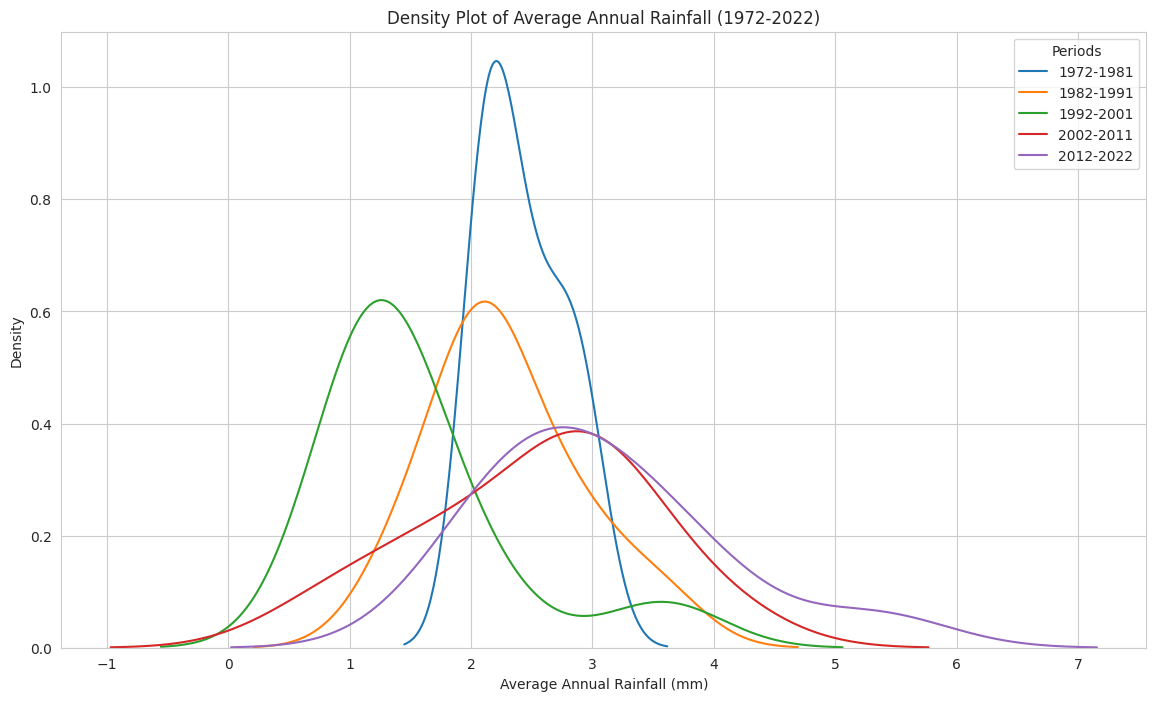

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year

annual_rainfall = data.groupby('year')['rain'].mean().reset_index()

periods = {
    '1972-1981': (1972, 1981),
    '1982-1991': (1982, 1991),
    '1992-2001': (1992, 2001),
    '2002-2011': (2002, 2011),
    '2012-2022': (2012, 2022)
}

plt.figure(figsize=(14, 8))

for period, (start_year, end_year) in periods.items():
    period_data = annual_rainfall[(annual_rainfall['year'] >= start_year) & (annual_rainfall['year'] <= end_year)]
    sns.kdeplot(period_data['rain'], label=period)

plt.title('Density Plot of Average Annual Rainfall (1972-2022)')
plt.xlabel('Average Annual Rainfall (mm)')
plt.ylabel('Density')
plt.legend(title='Periods')
plt.grid(True)
plt.show()


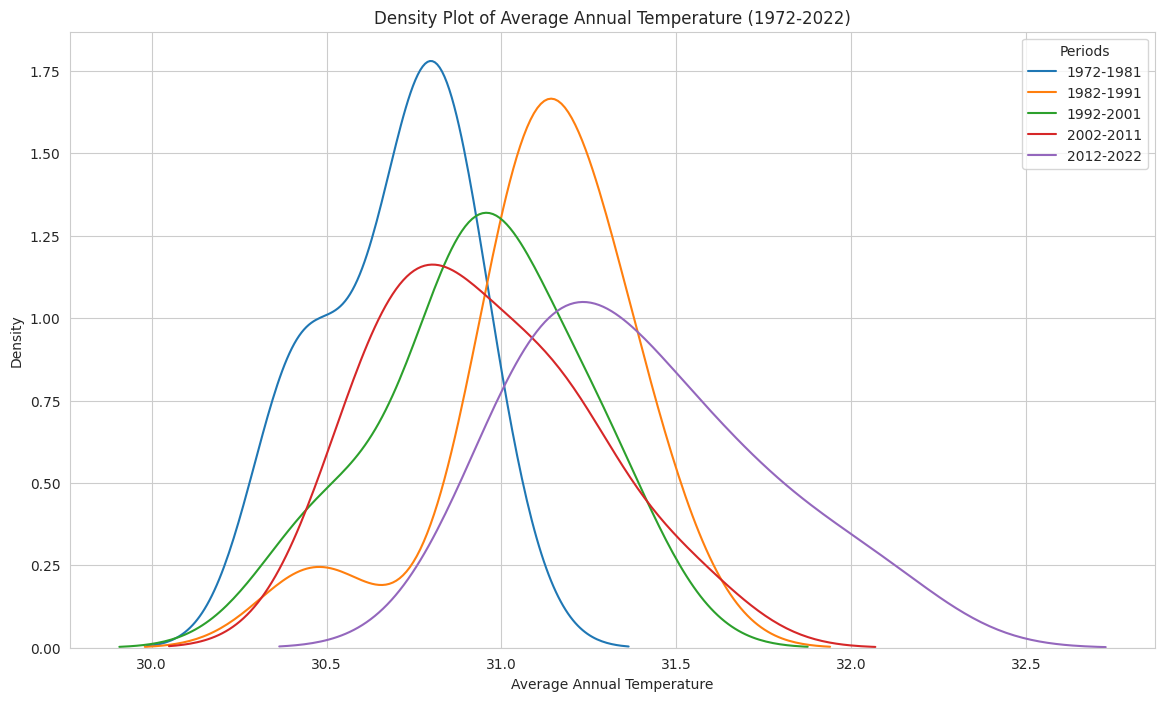

In [7]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year

annual_temp = data.groupby('year')['temp_max'].mean().reset_index()

periods = {
    '1972-1981': (1972, 1981),
    '1982-1991': (1982, 1991),
    '1992-2001': (1992, 2001),
    '2002-2011': (2002, 2011),
    '2012-2022': (2012, 2022)
}

plt.figure(figsize=(14, 8))

for period, (start_year, end_year) in periods.items():
    period_data = annual_temp[(annual_temp['year'] >= start_year) & (annual_temp['year'] <= end_year)]
    sns.kdeplot(period_data['temp_max'], label=period)

plt.title('Density Plot of Average Annual Temperature (1972-2022)')
plt.xlabel('Average Annual Temperature')
plt.ylabel('Density')
plt.legend(title='Periods')
plt.grid(True)
plt.show()
